In [1]:
import os
import unittest
import warnings

import polars as pl

from iohinspector import DataManager

from pprint import pprint
from iohinspector import align_data
from typing import Iterable
import numpy as np

# Example 1: multi-objective data from separate algorithms

Here, we will showcase how to load data, add an indicator, and plot the results 

In [2]:
manager = DataManager()

In [3]:
# We add all relevant directories to the data manager
for pm in [1,2,5]:
    manager.add_folder(f"/mnt/d/Data/IOH/MO_GSEMO/data_{pm}")

Printing the manager-object shows a table of all runs which are currently loaded

In [4]:
manager

DataManager(overview=shape: (75, 11)
┌─────────┬───────────────┬───────────────┬───────────────┬───┬──────────┬────────┬───────┬────────┐
│ data_id ┆ algorithm_nam ┆ algorithm_inf ┆ suite         ┆ … ┆ instance ┆ run_id ┆ evals ┆ best_y │
│ ---     ┆ e             ┆ o             ┆ ---           ┆   ┆ ---      ┆ ---    ┆ ---   ┆ ---    │
│ u64     ┆ ---           ┆ ---           ┆ str           ┆   ┆ u16      ┆ u32    ┆ u64   ┆ f64    │
│         ┆ str           ┆ str           ┆               ┆   ┆          ┆        ┆       ┆        │
╞═════════╪═══════════════╪═══════════════╪═══════════════╪═══╪══════════╪════════╪═══════╪════════╡
│ 1       ┆ GSEMO_1       ┆ algorithm_inf ┆ unknown_suite ┆ … ┆ 0        ┆ 1      ┆ 10000 ┆ 96.0   │
│         ┆               ┆ o             ┆               ┆   ┆          ┆        ┆       ┆        │
│ 2       ┆ GSEMO_1       ┆ algorithm_inf ┆ unknown_suite ┆ … ┆ 0        ┆ 2      ┆ 10000 ┆ 96.0   │
│         ┆               ┆ o             ┆           

With the manager, we can see what functions, algorithms etc are available

In [5]:
manager.algorithms

(Algorithm(name='GSEMO_1', info='algorithm_info'),
 Algorithm(name='GSEMO_2', info='algorithm_info'),
 Algorithm(name='GSEMO_5', info='algorithm_info'))

Now, we will load the data. Since it is multi-objective, we don't want to make the data monotonic.
Data loaded will always be a polars dataframe, which is the input for any of the further processing functions

In [6]:
df = manager.load(False, True)

In [7]:
df

data_id,algorithm_name,algorithm_info,suite,function_name,function_id,dimension,instance,run_id,evals,best_y,evaluations,raw_y,violation
u64,str,str,str,str,u16,u16,u16,u32,u64,f64,u64,f64,f64
1,"""GSEMO_1""","""algorithm_info""","""unknown_suite""","""OneMax""",1,100,0,1,10000,96.0,1,51.0,49.0
1,"""GSEMO_1""","""algorithm_info""","""unknown_suite""","""OneMax""",1,100,0,1,10000,96.0,2,53.0,47.0
1,"""GSEMO_1""","""algorithm_info""","""unknown_suite""","""OneMax""",1,100,0,1,10000,96.0,3,52.0,48.0
1,"""GSEMO_1""","""algorithm_info""","""unknown_suite""","""OneMax""",1,100,0,1,10000,96.0,4,52.0,48.0
1,"""GSEMO_1""","""algorithm_info""","""unknown_suite""","""OneMax""",1,100,0,1,10000,96.0,5,52.0,48.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…
75,"""GSEMO_5""","""algorithm_info""","""unknown_suite""","""OneMax""",1,100,4,25,10000,80.0,9996,50.0,44.0
75,"""GSEMO_5""","""algorithm_info""","""unknown_suite""","""OneMax""",1,100,4,25,10000,80.0,9997,75.0,39.0
75,"""GSEMO_5""","""algorithm_info""","""unknown_suite""","""OneMax""",1,100,4,25,10000,80.0,9998,59.0,25.0


The manager also keeps track of what columns were present in the data. In our case, our datafiles recorded evaluations, objective 1 and objective 2, so we can set the considered objective columns as follows:

In [8]:
print(manager.data_attributes)
obj_columns = manager.data_attributes[1:]

('evaluations', 'raw_y', 'violation')


Next, we can use different indicators to add to our data. Since we only require non-dominated points, we can start by adding a column showing which points are non-dominated (at the time they are evaluated) and keep only those ones. Note: this is not strictly required, but makes the next calculations more efficient.

In [12]:
from iohinspector.metrics import Anytime_HyperVolume, Anytime_NonDominated, add_indicator


In [13]:
df_nondominated = add_indicator(df, Anytime_NonDominated(), obj_columns).filter('nondominated')

Next, we can add an indicator, for example the hypervolume. Note that these indicators are parameterized, so in this case we pass in a reference point

In [14]:
df_hv = add_indicator(df_nondominated, Anytime_HyperVolume(reference_point=[100,100]), obj_columns)

The final step before plotting the data is to align it to the required function evaluations. This ensures we can aggregate across runs correctly, and can be done using the 'align_data' function, which requires a set of evaluations as input (for which the helper function get_sequence is provided)

In [16]:
from iohinspector import align_data
from iohinspector.metrics import get_sequence

In [17]:
evals = get_sequence(1, 1000, 50, True, True)

In [18]:
dt_plot = align_data(df_hv.select(
    pl.col('evaluations').cast(pl.Int64),
    pl.col('hv'),
    pl.col('data_id'), 
    pl.col('instance'),
    pl.col('algorithm_name')
), evals, ['data_id'], 'evaluations', 'hv', maximization=True)

With this dataframe, plotting can be done as normal, for example using seaborn:

In [21]:
import seaborn as sbs
import matplotlib.pyplot as plt

<Axes: xlabel='evaluations', ylabel='hv'>

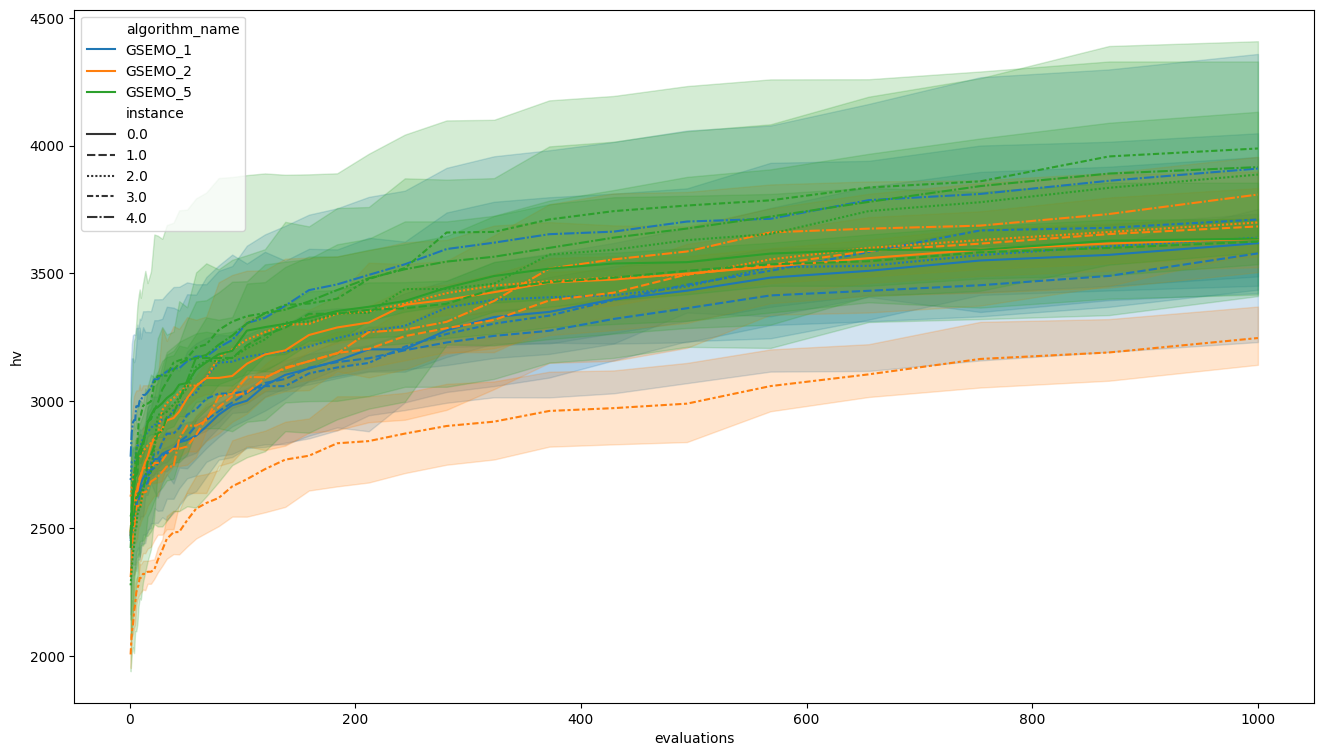

In [22]:
plt.figure(figsize=(16,9))
sbs.lineplot(data=dt_plot.sort(['data_id', 'evaluations']).to_pandas(), x='evaluations', y='hv', hue='algorithm_name', style='instance')

Note: the code above converts the data to a pandas-dataframe, as polars is not yet natively supported in seaborn. We will add ease-of-use functions for basic plotting and data aggregation, and their endpoints will be set to pandas by default.

# Example 2: plotting pareto front

In [24]:
from iohinspector.metrics import Final_NonDominated

In [25]:
df_pareto = add_indicator(df, Final_NonDominated(), obj_columns)

<Axes: xlabel='raw_y', ylabel='violation'>

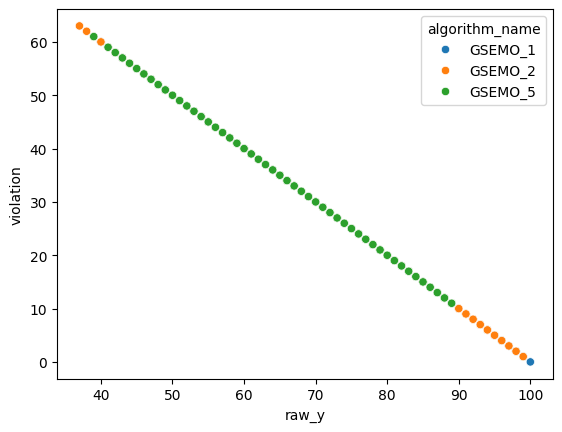

In [26]:
plt.figure()
sbs.scatterplot(df_hv.filter(pl.col("instance") == 1).to_pandas(), x=obj_columns[0], y=obj_columns[1], hue='algorithm_name')

Note that in this example we did the filtering on the loaded data, we could also have done this on the datamanager before loading.

# Example 3: Single-objective data

In [27]:
manager = DataManager()

In [28]:
for i in range(1,25):
    manager.add_folder(f"/mnt/d/Data/data_Competitions/Set3/{i}")

In [30]:
df = manager.load(True, True)

In [39]:
evals = get_sequence(1, 100000, 50, True, True)

In [40]:
df_aligned = align_data(df, np.array(evals, 'uint64'), ['data_id']) #we still need to do something with regard to datatype restrictions for evaluations

With this aligned data, we can already make quite a few types of plot. We still need to determine a common interface / structure for creating plots though

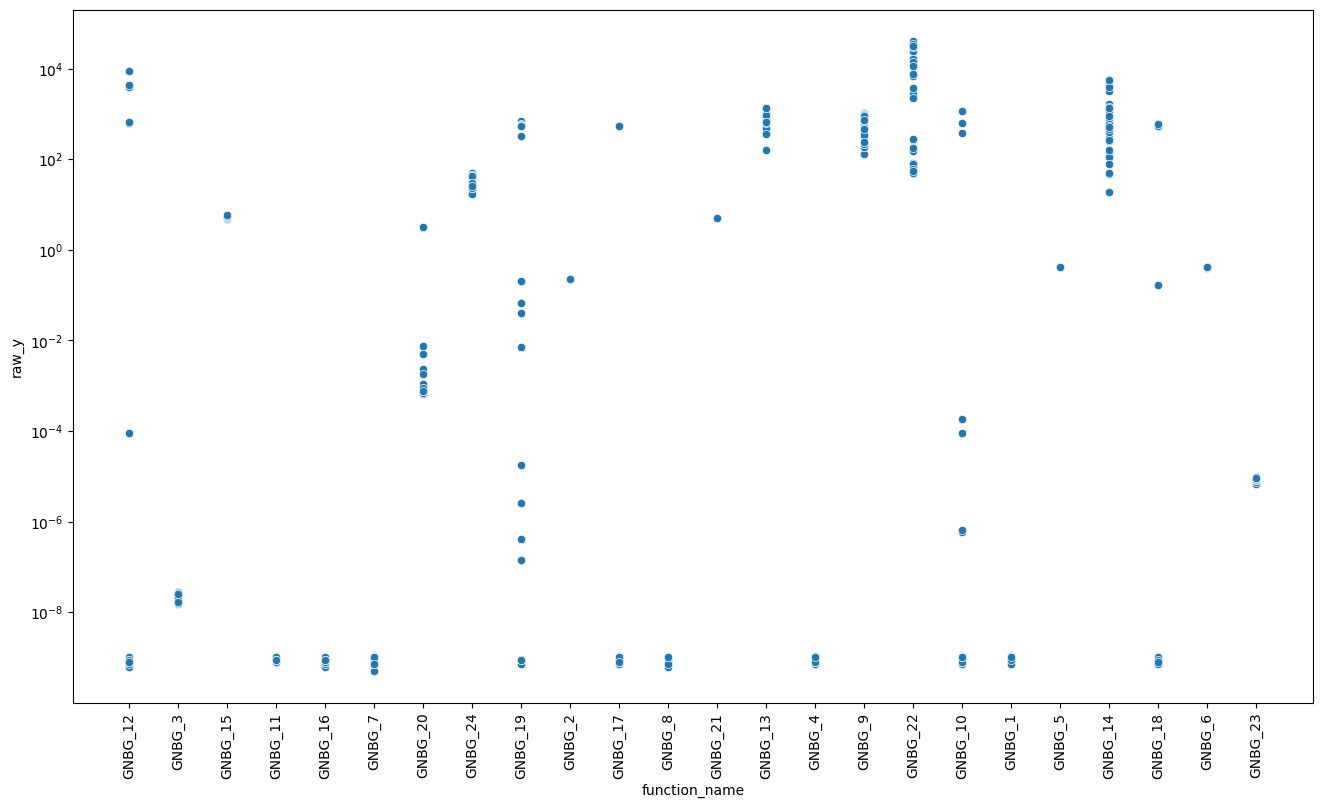

In [42]:
df_plot = df_aligned.filter(pl.col('evaluations') == 100000)
plt.figure(figsize=(16,9))
sbs.scatterplot(df_plot.to_pandas(), x='function_name', y='raw_y')
plt.xticks(rotation=90)
plt.yscale('log')

In [43]:
long = df_aligned[['evaluations', 'raw_y']]

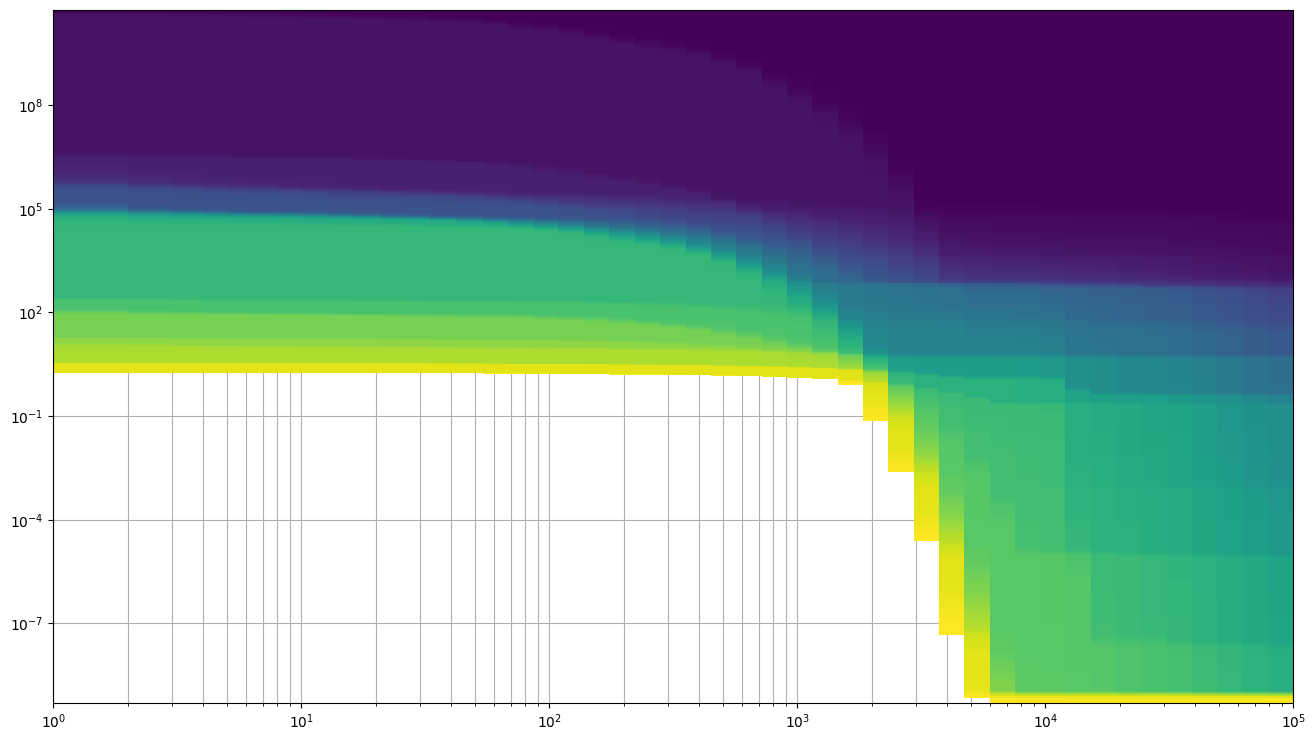

In [44]:
from matplotlib.patches import Polygon

n_quantiles = 200
quantiles = np.arange(0,1+1/((n_quantiles-1)*2), 1/(n_quantiles-1))
fig, ax = plt.subplots(figsize=(16,9))
colors = sbs.color_palette('viridis', n_colors=len(quantiles))
for quant, color in zip(quantiles, colors[::-1]):
    poly = np.array(long.group_by('evaluations').quantile(quant).sort('evaluations'))
    # poly = np.append(poly, np.array([[max(poly[:,0]), 0]]), axis=0)
    poly = np.append(poly, np.array([[max(poly[:,0]), long['raw_y'].max()]]), axis=0)
    poly = np.append(poly, np.array([[min(poly[:,0]), long['raw_y'].max()]]), axis=0)
    poly2 = np.repeat(poly,2, axis=0)
    poly2[2::2, 1] = poly[:,1][:-1]
    ax.add_patch(Polygon(poly2, facecolor = color))
plt.ylim(long['raw_y'].min(),long['raw_y'].max())
plt.xlim(min(evals),max(evals))
ax.set_axisbelow(True)
plt.grid(which='both', zorder=100)
plt.yscale('log')
plt.xscale('log')
plt.show()

Final plot example is the ECDF based on EAF, which we can get easiliy by using the EAF-transform function, which simply transforms the function-values

In [45]:
from iohinspector.metrics import _eaf_transform

In [47]:
eaf_plot_dt = _eaf_transform(df_aligned)['evaluations', 'function_name', 'eaf'].group_by(['evaluations', 'function_name']).mean().sort(['evaluations', 'function_name'])

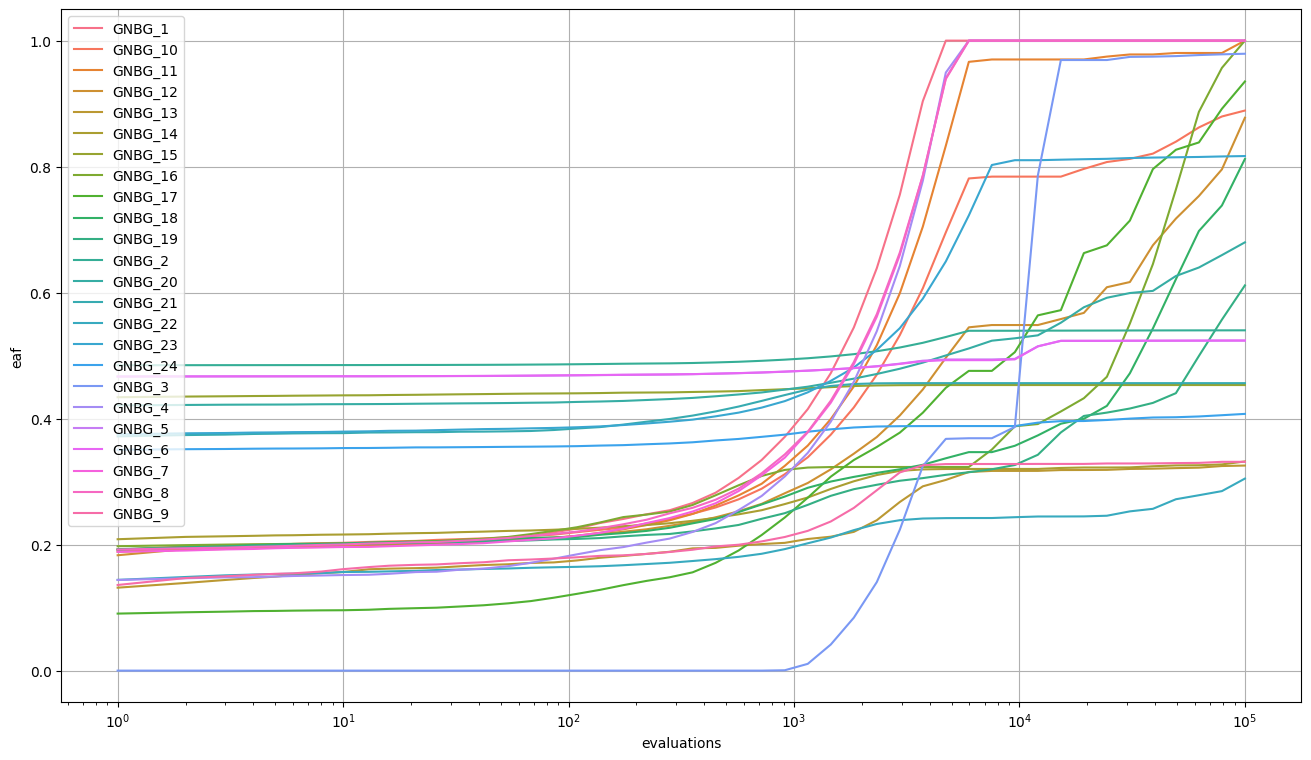

In [49]:
plt.figure(figsize=(16,9))
sbs.lineplot(eaf_plot_dt.to_pandas(), x='evaluations', y='eaf', hue='function_name')
plt.xscale('log')
plt.grid()
plt.legend(fontsize=10)